<a href="https://colab.research.google.com/github/KEMAL-MUDIE/Data-visualization-and-analysis-MA5755-at-IIT-Madras/blob/main/GE22M010_PA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# load the dataset
train_data = loadmat('train_set.mat')
test_data = loadmat('test_set.mat')

train_data

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Apr 10 23:29:46 2023',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[ 39,  44,  53, ...,  29,  26,  29],
        [ 63,  53,  35, ...,  41,  10,  24],
        [ 64,  76,  80, ...,  35,  37,  39],
        ...,
        [111, 114, 112, ...,  88,  86,  92],
        [110, 112, 113, ...,  92,  87,  90],
        [111, 111, 110, ...,  88,  79,  90]], dtype=uint8),
 'labels': array([[ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
          2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
          8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
         10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11,
         12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13,
         14, 14, 14, 14, 14, 14, 14, 14,

In [3]:
# extract the data matrices and labels
X_train = train_data['data']
y_train = train_data['labels'].flatten()
X_test = test_data['data']
y_test = test_data['labels'].flatten()

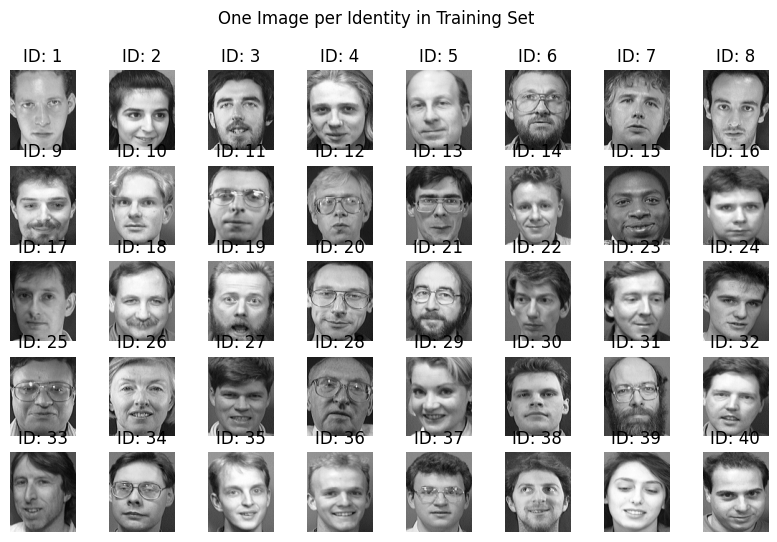

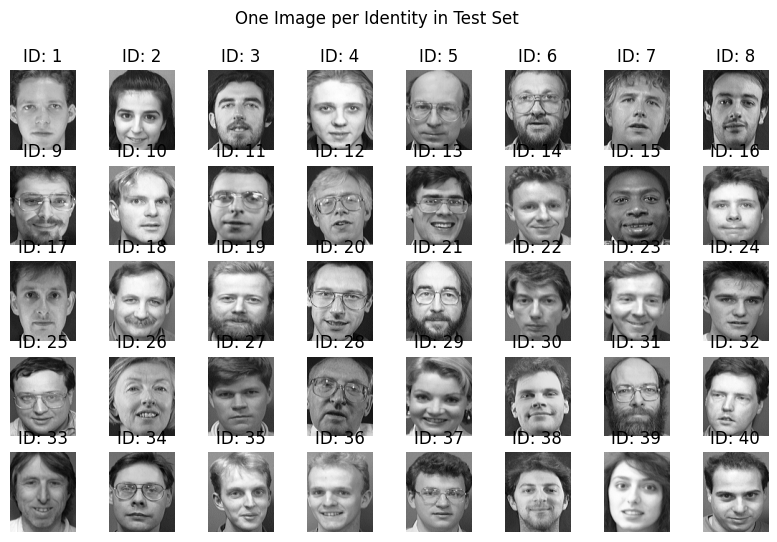

In [4]:
# visualize one image for each label in the training set
fig, axes = plt.subplots(5, 8, figsize=(10, 6))
for i in range(40):
    ax = axes[i // 8, i % 8]
    img = X_train[y_train == i][0].reshape(112, 92)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"ID: {i+1}")
    ax.axis('off')
plt.suptitle("One Image per Identity in Training Set")
plt.show()

# visualize one image for each label in the test set
fig, axes = plt.subplots(5, 8, figsize=(10, 6))
for i in range(40):
    ax = axes[i // 8, i % 8]
    img = X_test[y_test == i ][0].reshape(112, 92)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"ID: {i+1}")
    ax.axis('off')
plt.suptitle("One Image per Identity in Test Set")
plt.show()


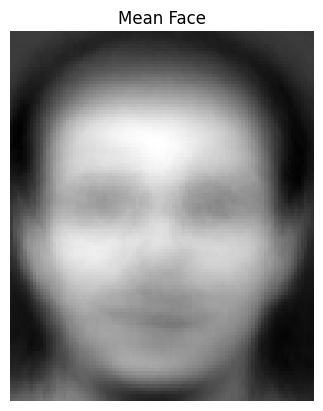

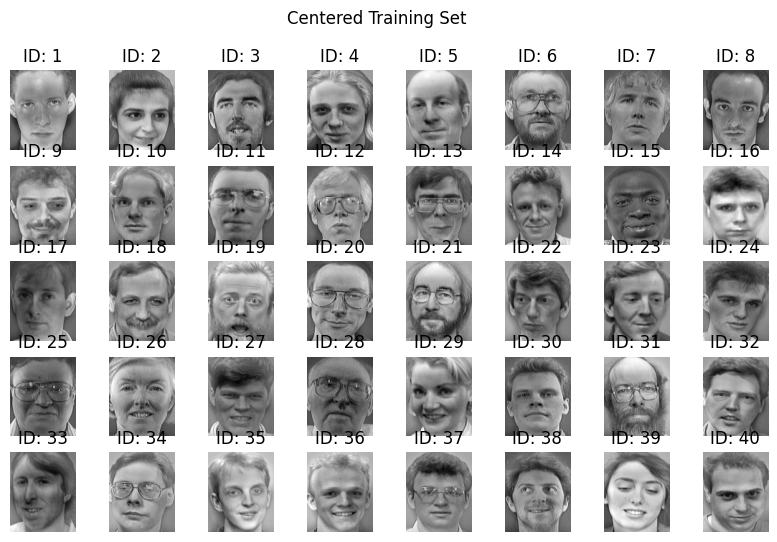

In [5]:
# find the mean image for the training set
mean_face = np.mean(X_train, axis=0)

# visualize the mean face
plt.imshow(mean_face.reshape(112, 92), cmap='gray')
plt.title("Mean Face")
plt.axis('off')
plt.show()

# center the train and test set using the mean face
X_train_centered = X_train - mean_face
X_test_centered = X_test - mean_face

# visualize the centered train set
fig, axes = plt.subplots(5, 8, figsize=(10, 6))
for i in range(40):
    ax = axes[i // 8, i % 8]
    img = X_train_centered[y_train == i ][0].reshape(112, 92)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"ID: {i+1}")
    ax.axis('off')
plt.suptitle("Centered Training Set")
plt.show()



find the eigenvectors of the covariance matrix

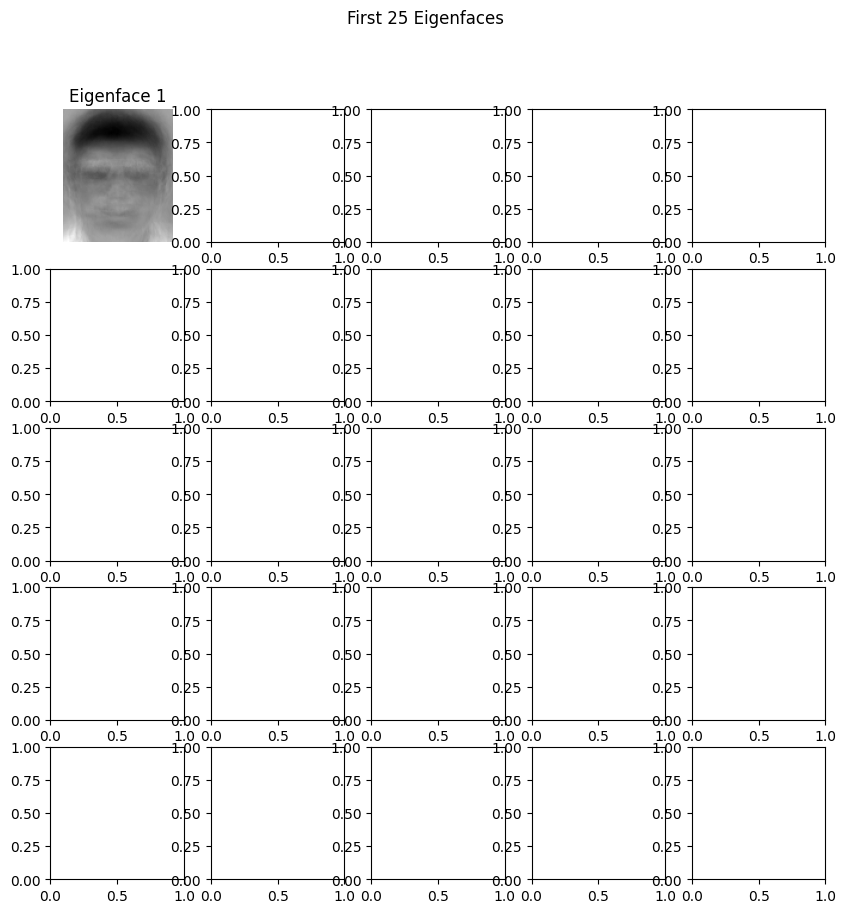

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


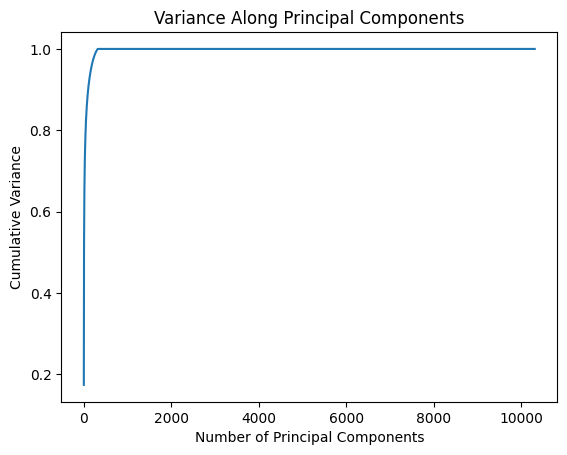

Number of Principal Components needed to capture 95% of the total variance: 164
Maximum number of Principal Components: 10304


In [11]:
# find the eigenvectors of the covariance matrix
cov_mat = np.cov(X_train_centered.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

#sort the eigenvalues and eigenvectors in descending order
sorted_idx = eigen_vals.argsort()[::-1]
eigen_vals = eigen_vals[sorted_idx]
eigen_vecs = eigen_vecs[:, sorted_idx]

#display the first 25 eigenfaces
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i in range(25):
  ax = axes[i // 5, i % 5]
  img = eigen_vecs[:, i].reshape(112, 92)
  ax.imshow(img.real, cmap='gray')
  ax.axis('off')
  ax.set_title(f"Eigenface {i+1}")
  plt.suptitle("First 25 Eigenfaces")
  plt.show()

#plot the variance along each principal component
variance = eigen_vals / np.sum(eigen_vals)
cumulative_variance = np.cumsum(variance)
d = len(eigen_vals)
plt.plot(np.arange(1, d+1), cumulative_variance)
plt.title("Variance Along Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")
plt.show()

#find the minimum number of principal components needed to capture 95% of the total variance
k = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of Principal Components needed to capture 95% of the total variance: {k}")

#find the maximum number of principal components
print(f"Maximum number of Principal Components: {d}")



#3

In [32]:
from scipy.linalg import svd

# set the number of principal components to use
k = 100

# compute the top k eigenvectors of the covariance matrix
V, s, Vt = svd(X_train_centered.T, full_matrices=False)
eigenfaces = Vt[:k]

# compute the k-dimensional representation of each train and test sample
# train_coeffs = np.dot(X_train_centered, eigenfaces.T)
# test_coeffs = np.dot(X_test_centered, eigenfaces.T)


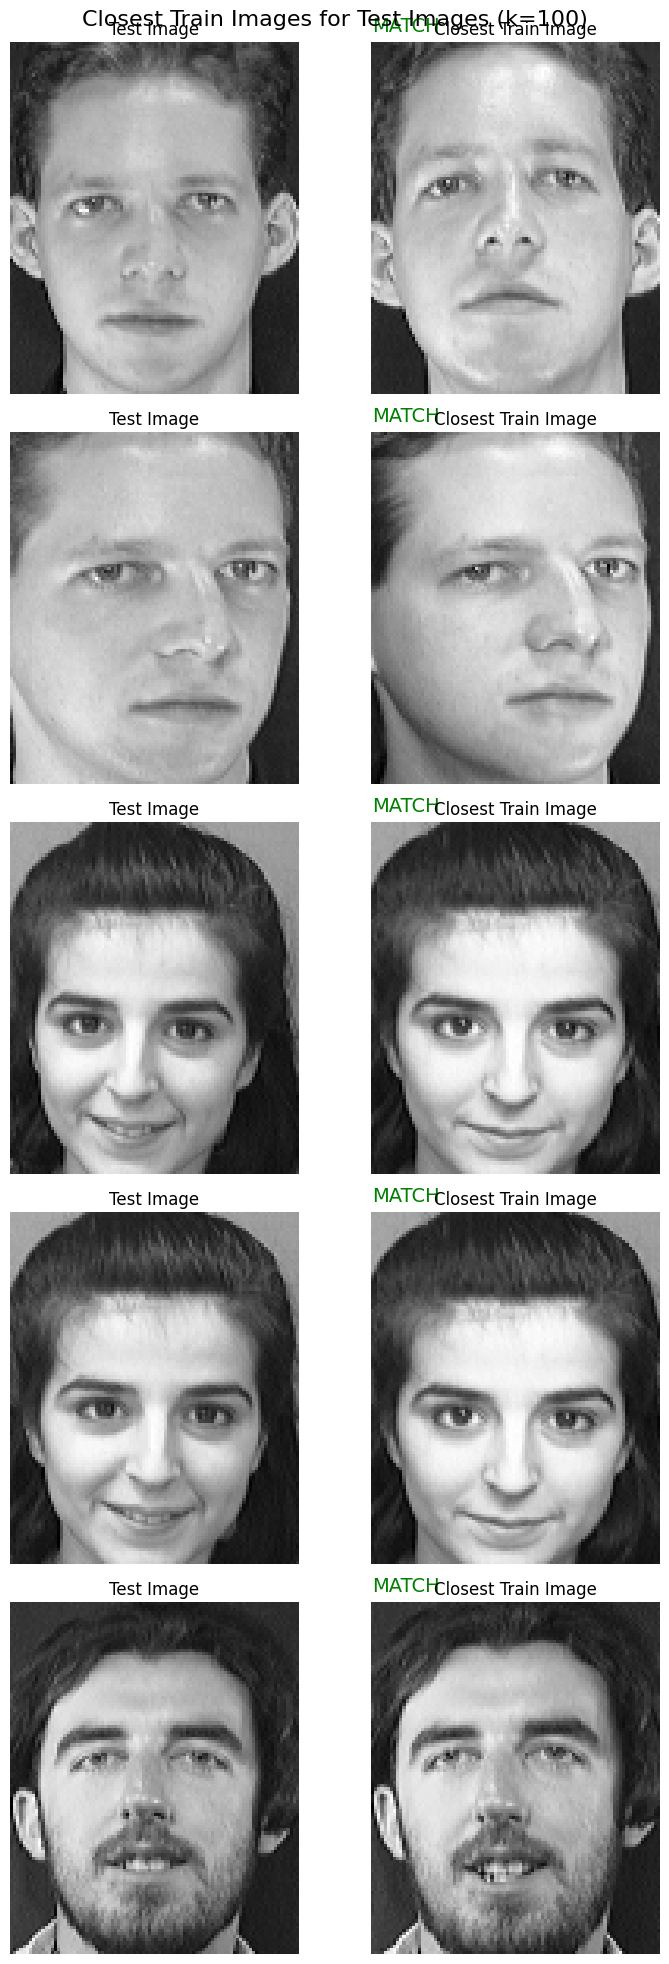

Overall Accuracy (k=100): 98.75%


In [33]:
# calculate the k-dimensional representation for each train and test sample
Z_train = X_train_centered @ V[:, :k]
Z_test = X_test_centered @ V[:, :k]

# find the closest train sample for each test sample in the k-dimensional subspace
closest_train_idx = []
for i in range(len(X_test)):
    distances = np.sum((Z_train - Z_test[i])**2, axis=1)
    closest_train_idx.append(np.argmin(distances))

# display the test sample and its closest train sample
fig, axes = plt.subplots(5, 2, figsize=(8, 20))
for i in range(5):
    axes[i, 0].imshow(X_test[i].reshape(112, 92), cmap='gray')
    axes[i, 0].set_title("Test Image")
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(X_train[closest_train_idx[i]].reshape(112, 92), cmap='gray')
    axes[i, 1].set_title("Closest Train Image")
    axes[i, 1].axis('off')
    
    # check if labels match
    test_label = y_test[i]
    closest_train_label = y_train[closest_train_idx[i]]
    if test_label == closest_train_label:
        match_str = "MATCH"
    else:
        match_str = "NO MATCH"
    axes[i, 1].text(0, -4, match_str, fontsize=14, color='green' if match_str == "MATCH" else 'red')

plt.suptitle(f"Closest Train Images for Test Images (k={k})", fontsize=16)
plt.tight_layout()
plt.show()

# calculate overall accuracy for the test set
closest_train_labels = y_train[closest_train_idx]
accuracy = np.mean(y_test == closest_train_labels)
print(f"Overall Accuracy (k={k}): {accuracy*100:.2f}%")
